## Homework Review
## Iterative vs Recursive
## MergeSort

In [1]:
from IPython.display import Image

In [2]:
# 0 .. X
# 0, 1, 2, .....
# 0,x//2   x//2, x
def mySqrt(x: int) -> int:
    left, right = 0, x
    while left < right:
        mid = ( left + right ) // 2
        if mid ** 2 == x:
            return mid
        elif mid ** 2 > x:
            right = mid -1
        else:
            left = mid + 1

    # this is edge case. for x = 2
    if left ** 2 > x:
        left = left - 1
    return left

In [3]:
for i in [0, 1, 2, 3, 4, 63, 64, 65, 1000000]:
    print(mySqrt(i), end= ' ')

0 1 1 1 2 7 8 8 1000 

In [4]:
def mySqrt_with_steps(x: int) -> int:
    steps=0
    left, right = 0, x
    while left < right:
        steps += 1
        mid = ( left + right ) // 2
        if mid ** 2 == x:
            print("steps=", steps)
            return mid
        elif mid ** 2 > x:
            right = mid -1
        else:
            left = mid + 1
    if left ** 2 > x:
        left -= 1
    print("steps=", steps)
    return left


In [5]:
mySqrt_with_steps(1000000)

steps= 19


1000

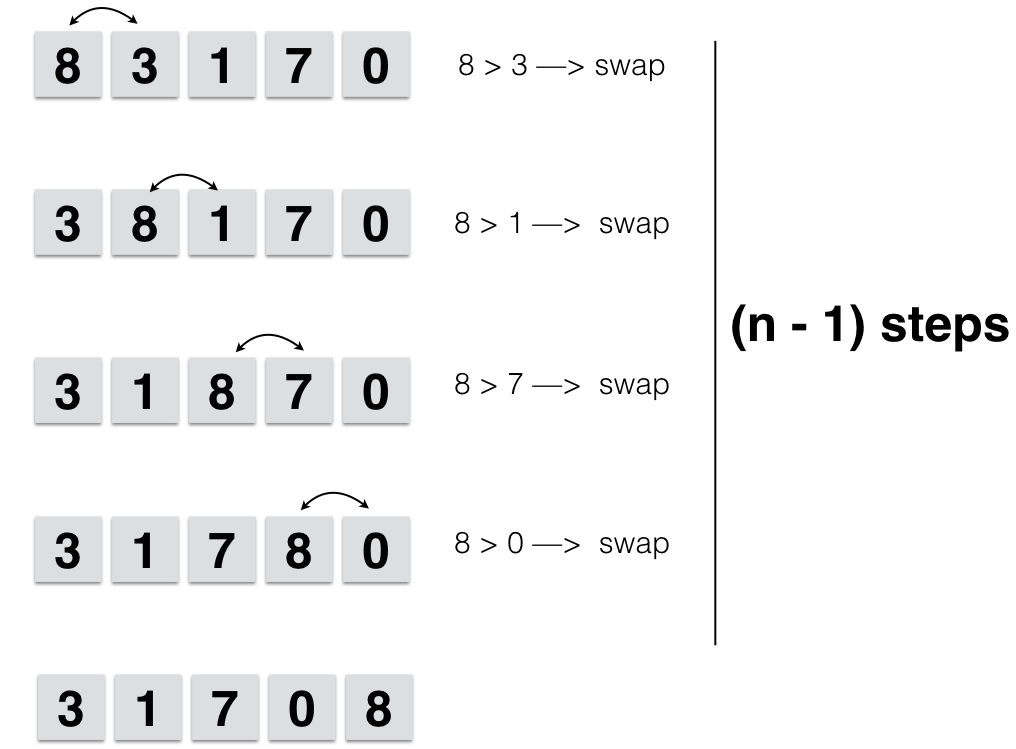

In [6]:
Image("bubblesort.jpg")

In [7]:
def bubble_sort(nums):
#     print(nums)
    while True:
        swapped = False
        for i in range(1, len(nums)):
            if nums[i] < nums[i-1]:
                nums[i], nums[i-1] = nums[i-1], nums[i]
                swapped = True
#                 print(nums)
        if not swapped:
            break
    return nums

In [8]:
bubble_sort([64, 34, 25, 12, 22, 11, 90])

[11, 12, 22, 25, 34, 64, 90]

Iterative vs Recursive

Recursive -> Divide and Conquer  ( Top down approach )
- break down the big problem into smaller problems, 
- continue doing that until the solution is obvious, 
- then go back to solve the original problem

Iterative ( bottom up )
- Instead of solving the complex problem, start with the problem in its simplest form, 
- then step by step, move toward solving the original problem

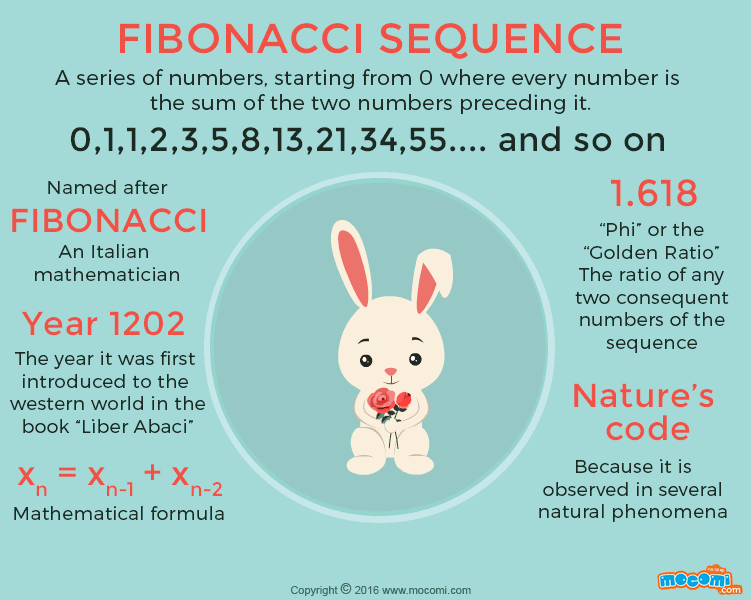

In [9]:
Image(filename='fibonacci.gif') 

In [10]:
def f(n):
    if n >= 2:
        return f(n-1) + f(n-2)

    else:
        return n
    
# n -> n -1, n-2 ....


def f2(n):
    """
    a bottom up approach
    can we figure out 1, 2, ... n?
    0, 1,1 2 3 5 ...
    """
    if n < 2:
        return n

    a, b = 0, 1

    for _ in range(2, n+1): # 2, 3, .. n
        a, b = b, a+b

    return b


In [11]:
f(5)

5

In [12]:
for i in range(6):
    print(f(i))

0
1
1
2
3
5


In [13]:
f2(5)

5

In [14]:
for i in range(6):
    print(f2(i))

0
1
1
2
3
5


In [15]:
from tracer import trace

In [16]:
@trace
def f(n):
    if n >= 2:
        return f(n-1) + f(n-2)

    else:
        return n

In [17]:
f(3)

|-- f(3)
|  |-- f(2)
|  |  |-- f(1)
|  |  |-- f(0)
|  |-- f(1)


2

## Merge Sort

Author: Von Neuman ( Eniac Designer and mathematian )
https://en.wikipedia.org/wiki/ENIAC


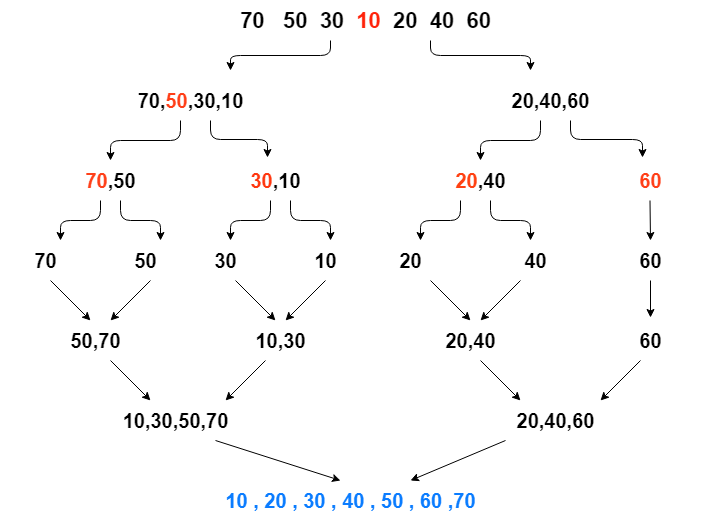

In [18]:
Image("mergesort.jpg")

In [19]:
result = [10, 30]
result.extend([50, 70])
print(result)

[10, 30, 50, 70]


In [20]:
result = [10, 30]
result.append([50, 70])
print(result)

[10, 30, [50, 70]]


In [21]:
@trace
def merge_two_sorted_lists(left, right):
    result = []

    while left and right:
        if left[0] < right[0]:
            result.append(left.pop(0))
        else:
            result.append(right.pop(0))

    if not left:
        result.extend(right)
    else:
        result.extend(left)
    return result

@trace
def merge_sort(nums):
    size = len(nums)
    if size <= 1:
        return nums

    mid = size // 2   # size = 7, mid = 3
    # divide
    left, right = nums[:mid], nums[mid:]
    left_sorted = merge_sort(left) 
    right_sorted = merge_sort(right)
    return merge_two_sorted_lists(left_sorted, right_sorted)


In [24]:
#       0    1   2   3   4   5   6   List slicing
nums = [70, 50, 30, 10, 20, 40, 60]

In [26]:
size = len(nums)
size

7

In [27]:
mid = size // 2
print(mid)

3


In [32]:
nums[:3] # 0, 1, 2  nums[0:3]  = nums[:3]

[70, 50, 30]

In [31]:
nums[3:]

[10, 20, 40, 60]

In [22]:
merge_sort([70, 50, 30, 10, 20, 40, 60])

|-- merge_sort([70, 50, 30, 10, 20, 40, 60])
|  |-- merge_sort([70, 50, 30])
|  |  |-- merge_sort([70])
|  |  |-- merge_sort([50, 30])
|  |  |  |-- merge_sort([50])
|  |  |  |-- merge_sort([30])
|  |  |  |-- merge_two_sorted_lists([50], [30])
|  |  |-- merge_two_sorted_lists([70], [30, 50])
|  |-- merge_sort([10, 20, 40, 60])
|  |  |-- merge_sort([10, 20])
|  |  |  |-- merge_sort([10])
|  |  |  |-- merge_sort([20])
|  |  |  |-- merge_two_sorted_lists([10], [20])
|  |  |-- merge_sort([40, 60])
|  |  |  |-- merge_sort([40])
|  |  |  |-- merge_sort([60])
|  |  |  |-- merge_two_sorted_lists([40], [60])
|  |  |-- merge_two_sorted_lists([10, 20], [40, 60])
|  |-- merge_two_sorted_lists([30, 50, 70], [10, 20, 40, 60])


[10, 20, 30, 40, 50, 60, 70]

In [23]:
@trace
def merge_sort(nums):
    size = len(nums)
    if size <= 1:
        return nums

    mid = (size+1) // 2  # note this is the exact way of splitting showed in graph !!
    # it's (size+1)//2, not size//2 + 1  !!
    
    # divide
    left, right = nums[:mid], nums[mid:]
    left = merge_sort(left)
    right = merge_sort(right)
    return merge_two_sorted_lists(left, right)

merge_sort([70, 50, 30, 10, 20, 40, 60])

|-- merge_sort([70, 50, 30, 10, 20, 40, 60])
|  |-- merge_sort([70, 50, 30, 10])
|  |  |-- merge_sort([70, 50])
|  |  |  |-- merge_sort([70])
|  |  |  |-- merge_sort([50])
|  |  |  |-- merge_two_sorted_lists([70], [50])
|  |  |-- merge_sort([30, 10])
|  |  |  |-- merge_sort([30])
|  |  |  |-- merge_sort([10])
|  |  |  |-- merge_two_sorted_lists([30], [10])
|  |  |-- merge_two_sorted_lists([50, 70], [10, 30])
|  |-- merge_sort([20, 40, 60])
|  |  |-- merge_sort([20, 40])
|  |  |  |-- merge_sort([20])
|  |  |  |-- merge_sort([40])
|  |  |  |-- merge_two_sorted_lists([20], [40])
|  |  |-- merge_sort([60])
|  |  |-- merge_two_sorted_lists([20, 40], [60])
|  |-- merge_two_sorted_lists([10, 30, 50, 70], [20, 40, 60])


[10, 20, 30, 40, 50, 60, 70]